# Regression in Scikit-learn

In [439]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#other
from sklearn.model_selection import train_test_split  # jab ji machine learning ka module pa work karna ha ya train_test_split lazmi karna ha takay data ko split kyea ja sakay
from sklearn.linear_model import LinearRegression

In [440]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [441]:
# i seleceted twocolumns 
df_linear=df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [442]:
# simple Linear Regression
x=df[['age']] # this is double dimensional data
y=df['fare']

In [443]:
df_linear.isnull().sum() /len(x) *100
# y.isnull().sum() /len(y) *100   # in y no null values

age     19.86532
fare     0.00000
dtype: float64

In [444]:
# age column fill with mean
df['age'] = df_linear['age'].fillna(df_linear['age'].mean(), inplace=True)

C:\Users\Abdul-Samad\AppData\Local\Temp\ipykernel_3804\978353235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'] = df_linear['age'].fillna(df_linear['age'].mean(), inplace=True)
C:\Users\Abdul-Samad\AppData\Local\Temp\ipykernel_3804\978353235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df_linear['age'].fillna(

In [445]:
df_linear.isnull().sum()/len(df_linear) *100

age     0.0
fare    0.0
dtype: float64

In [446]:
x.shape

(891, 1)

In [447]:
y.shape

(891,)

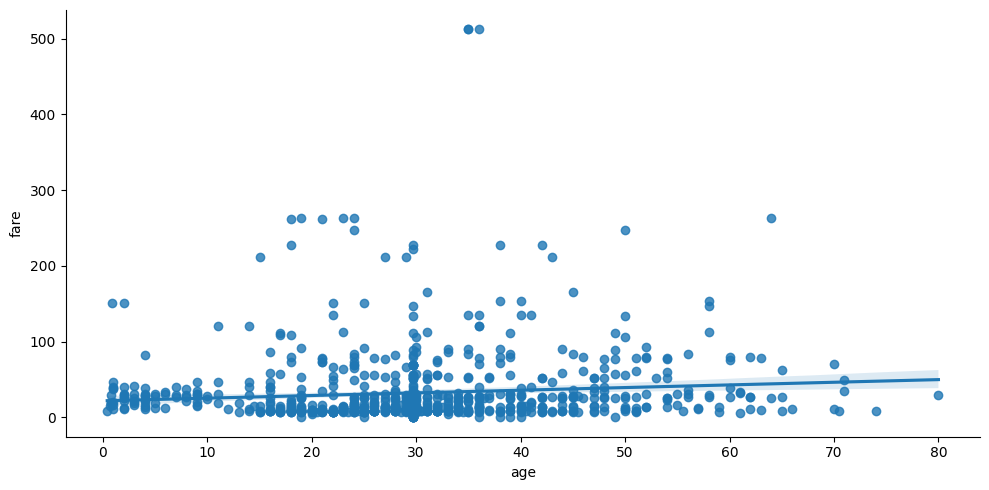

In [448]:
# Plot
sns.lmplot(x='age', y='fare', data=df_linear, height=5, aspect=2)
plt.show()

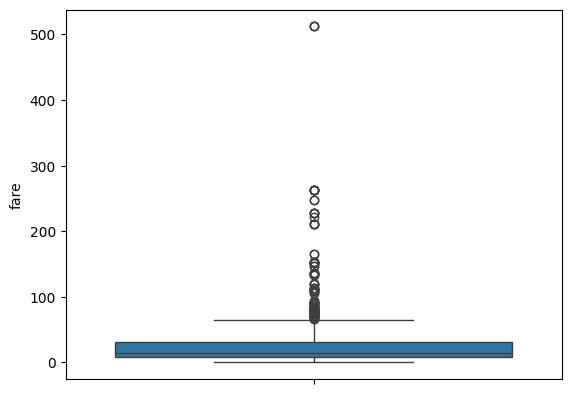

In [449]:
# Box plot for remove the outliers
sns.boxplot(y='fare', data=df_linear)
plt.show()

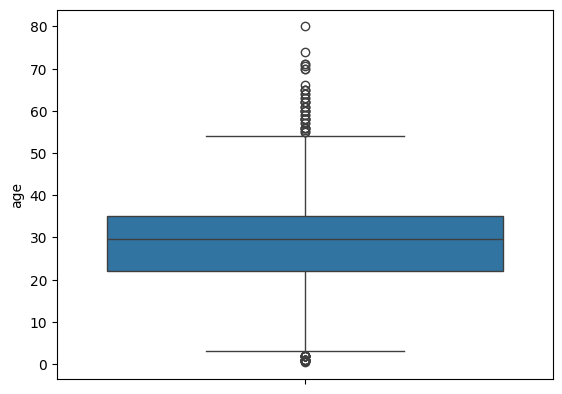

In [450]:
sns.boxplot(y='age', data=df_linear)
plt.show()

In [451]:
df_linear=df_linear[(df_linear["age"]>0) & (df_linear["age"]<55)]      # this is for remove the outliers

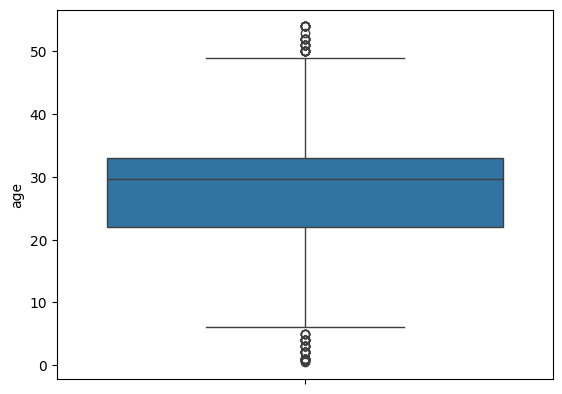

In [452]:
# after removing the outliers from age column
sns.boxplot(y='age', data=df_linear)
plt.show()

In [453]:
df_linear=df_linear[(df_linear["age"]>5)&(df_linear["age"]<50)]      # this is for remove the outliers

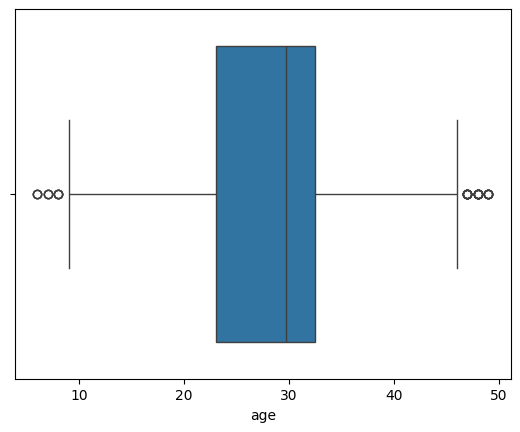

In [454]:
sns.boxplot(x='age', data=df_linear)
plt.show()

In [455]:
df_linear=df_linear[(df_linear["age"]>9)&(df_linear["age"]<45)]      # this is for remove the outliers

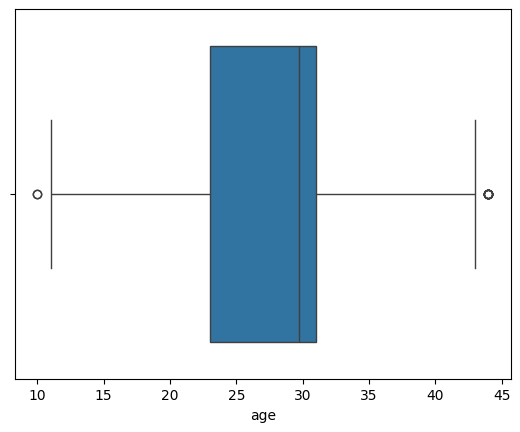

In [456]:
sns.boxplot(x='age', data=df_linear)
plt.show()

In [457]:
df_linear=df_linear[(df_linear["age"]>8)&(df_linear["age"]<40)]

      # this is for remove the outliers

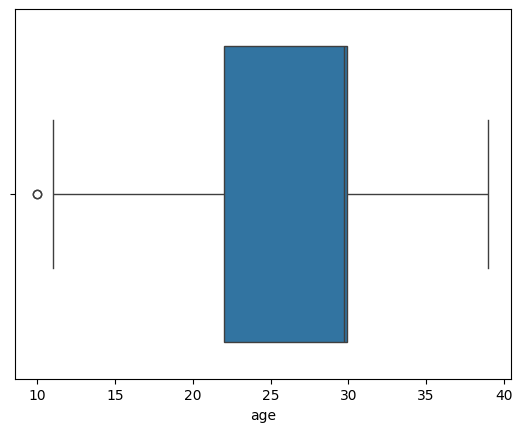

In [458]:
sns.boxplot(x='age', data=df_linear)
plt.show()

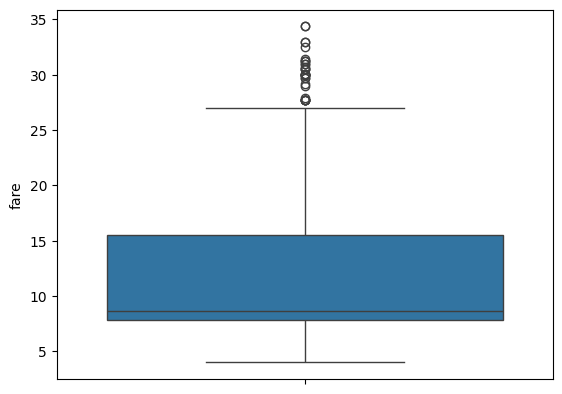

In [459]:
df_linear= df_linear[(df_linear['fare'] > 0) & (df_linear['fare'] < 35)]  # this is for remove the outliers

sns.boxplot(y='fare', data=df_linear)
plt.show()

In [460]:
X=df_linear[['age']]  # this is double dimensional data
y=df_linear['fare']

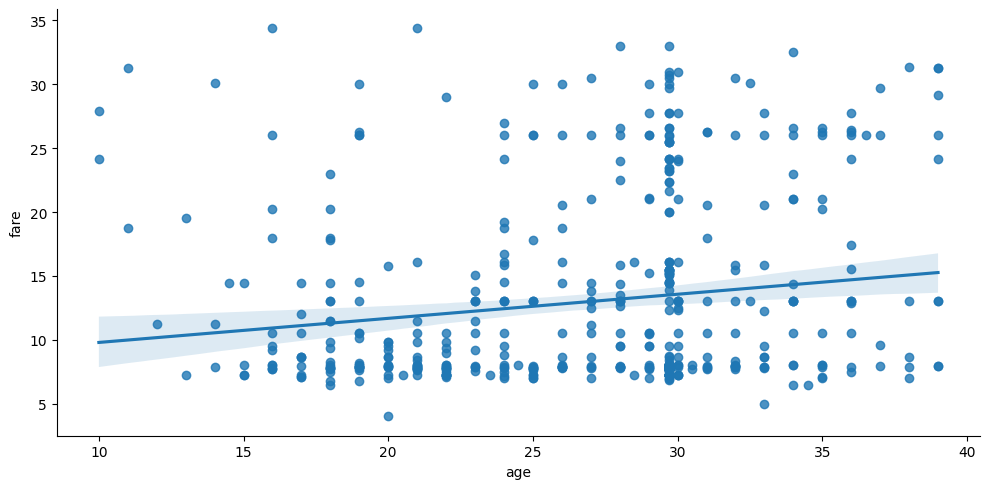

In [461]:
sns.lmplot(x='age', y='fare', data=df_linear, height=5, aspect=2) # after removing the outliers
plt.show()

In [462]:
from sklearn.model_selection import train_test_split  # jab ji machine learning ka module pa work karna ha ya train_test_split lazmi karna ha takay data ko split kyea ja sakay
from sklearn.linear_model import LinearRegression
# call the model 
model=LinearRegression()
# fit the model
model.fit(X,y)


LinearRegression()

In [465]:
# predict model 
model.predict([[600]])  # this is for predict the fare of age 25 here use 2 brackets because we are using double dimensional data

C:\Users\Abdul-Samad\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([121.1022173])

In [468]:
# model evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [469]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((418, 1), (105, 1), (418,), (105,))

In [470]:
# fit model 
model.fit(X_train, y_train)

LinearRegression()

In [471]:
# prediction
y_pred = model.predict(X_test)
print(y_pred)

[12.82963341 13.52196839 11.70666024 13.2039578  13.52196839 14.13976878
 13.95260659 13.52196839 13.52196839 11.80024134 13.76544439 11.70666024
 11.14517365 13.76544439 13.67186329 13.39112    14.51409317 13.39112
 12.82963341 13.5782822  13.52196839 13.39112    11.89382243 15.07557976
 13.2039578  12.08098463 13.2039578  13.52196839 13.76544439 12.82963341
 13.01679561 13.52196839 11.51949804 13.39112    13.52196839 12.08098463
 14.13976878 11.89382243 13.52196839 14.04618769 13.5782822  11.14517365
 15.07557976 10.95801145 13.5782822  14.13976878 10.67726816 12.08098463
 13.52196839 13.39112    11.51949804 11.51949804 13.95260659 13.52196839
 11.70666024 14.51409317 10.95801145 13.52196839 13.52196839 13.52196839
 12.45530902 11.89382243 11.14517365 11.89382243 15.07557976 13.52196839
 12.08098463 13.52196839 13.2039578  13.52196839 12.26814682 13.5782822
 13.52196839 13.39112    11.89382243 13.52196839 12.08098463 13.52196839
 13.52196839 11.33233585 13.2039578  12.64247122 11.893

In [472]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

      Actual  Predicted
889  30.0000  12.829633
653   7.8292  13.521968
12    8.0500  11.706660
313   7.8958  13.203958
121   8.0500  13.521968
..       ...        ...
649   7.5500  12.268147
704   7.8542  12.829633
508  22.5250  13.203958
735  16.1000  13.297539
251  10.4625  13.391120

[105 rows x 2 columns]


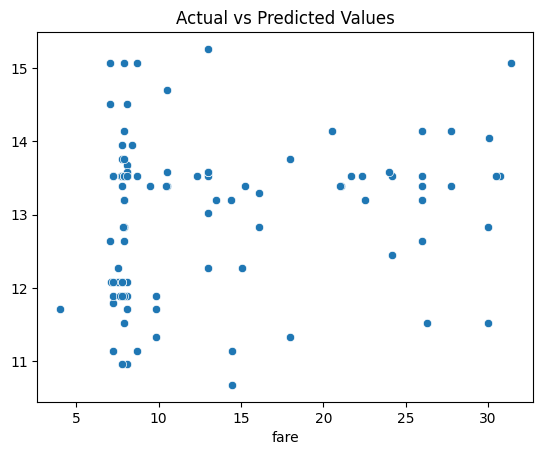

In [473]:
# compare
sns.scatterplot(x=y_test,y=y_pred, data=df)
plt.title('Actual vs Predicted Values')
plt.show()


In [474]:
# Score
model.score(X_test, y_test)

0.020139258832748252